In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = 'marketing_campaign.csv'
data = pd.read_csv(data_path , sep=';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# Calcul de l'âge à partir de l'année de naissance
data['Age'] = 2024 - data['Year_Birth']

In [14]:

# Statistiques descriptives pour les variables numériques
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,43


In [16]:
categorical_columns = ['Education', 'Marital_Status']
cat_distribution = data[categorical_columns].apply(lambda x: x.value_counts())
cat_distribution

,Education,Marital_Status
2n Cycle,203.0,NaN
Absurd,NaN,2.0
Alone,NaN,3.0
Basic,54.0,NaN
Divorced,NaN,232.0
Graduation,1127.0,NaN
Married,NaN,864.0
Master,370.0,NaN
PhD,486.0,NaN
Single,NaN,480.0


In [17]:
# Visualisation des distributions
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, "Distribution de l'âge")

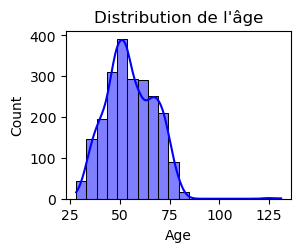

In [18]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution de l\'âge')

Text(0.5, 1.0, 'Distribution des revenus')

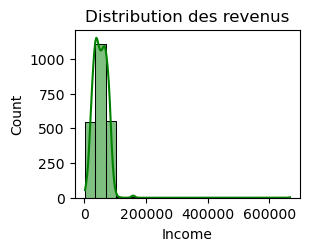

In [19]:
# Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Income'], bins=20, kde=True, color='green')
plt.title('Distribution des revenus')

Text(0.5, 1.0, 'Distribution des achats de vin')

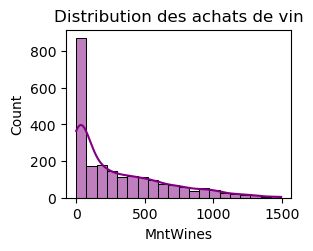

In [21]:
# Montant dépensé en vin
plt.subplot(2, 2, 4)
sns.histplot(data['MntWines'], bins=20, kde=True, color='purple')
plt.title('Distribution des achats de vin')


In [22]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Distribution de la récence')

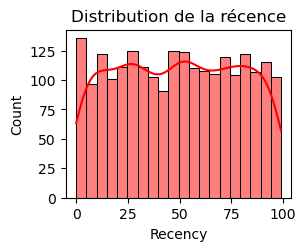

In [20]:
# Recency distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Recency'], bins=20, kde=True, color='red')
plt.title('Distribution de la récence')


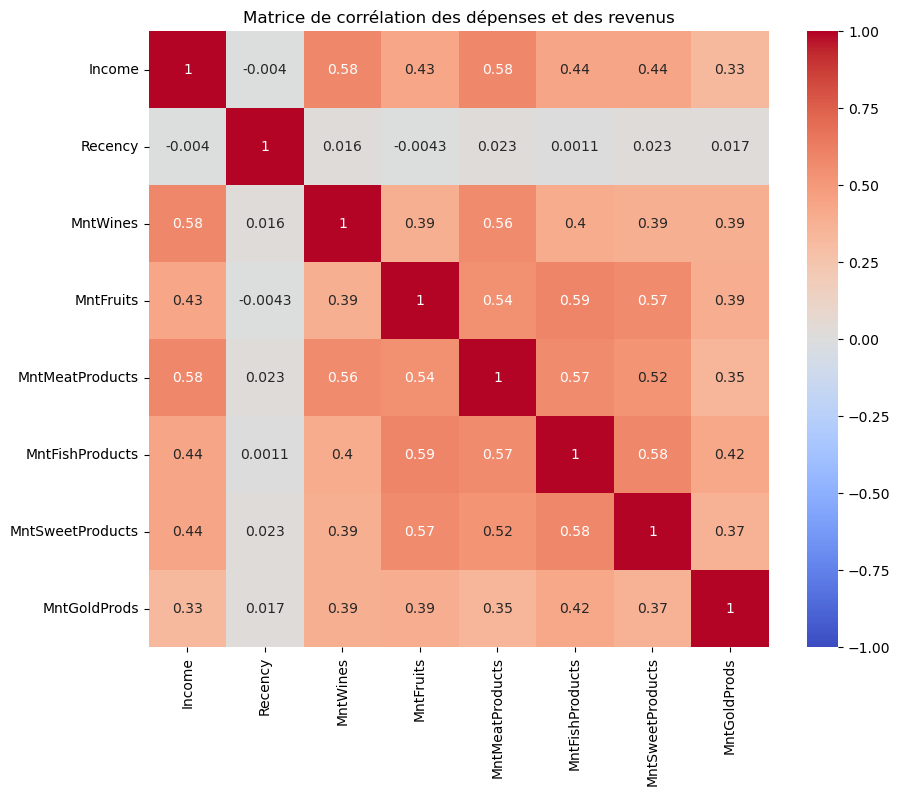

In [23]:
# Matrice de corrélation
correlation_matrix = data[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des dépenses et des revenus')
plt.show()


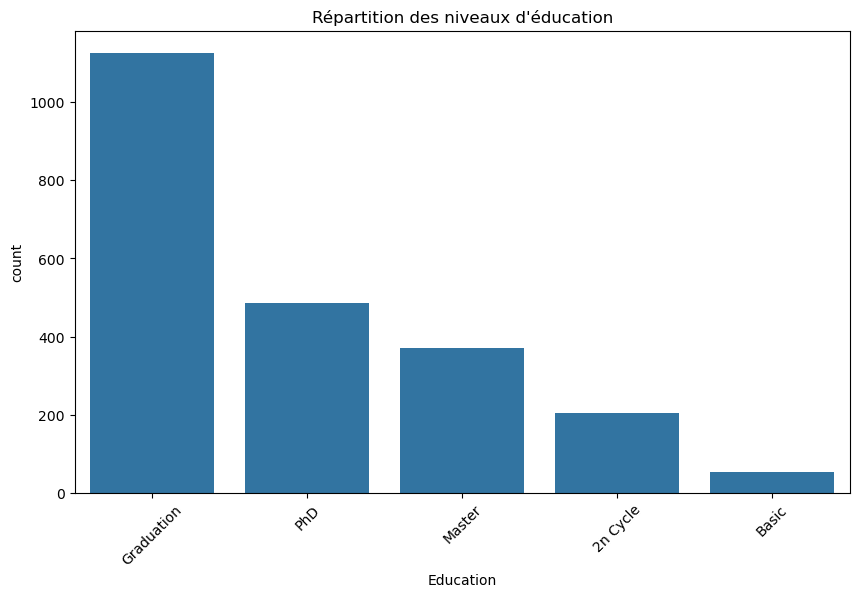

In [15]:
# Répartition des niveaux d'éducation
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Education', order=data['Education'].value_counts().index)
plt.title("Répartition des niveaux d'éducation")
plt.xticks(rotation=45)
plt.show()


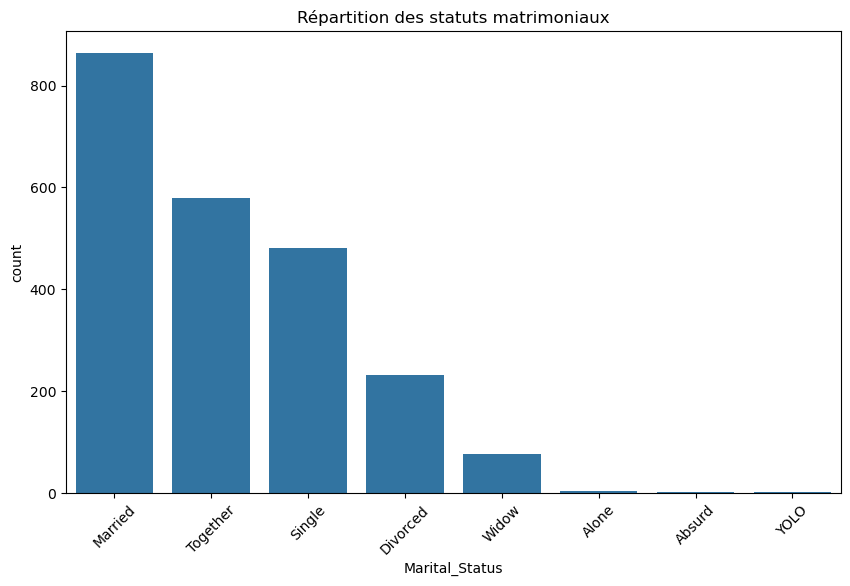

In [7]:
# Répartition des statuts matrimoniaux
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Marital_Status', order=data['Marital_Status'].value_counts().index)
plt.title("Répartition des statuts matrimoniaux")
plt.xticks(rotation=45)
plt.show()

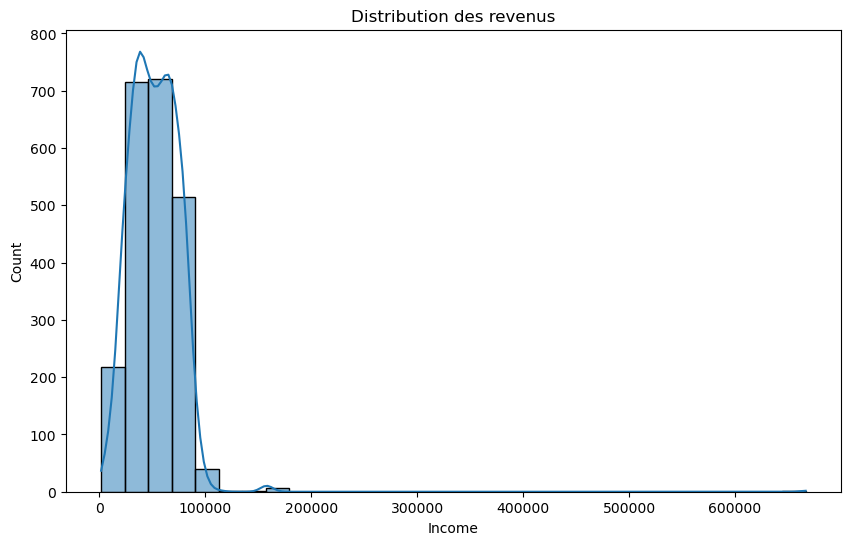

In [8]:
# Distribution des revenus (Income)
plt.figure(figsize=(10,6))
sns.histplot(data['Income'].dropna(), kde=True, bins=30)
plt.title("Distribution des revenus")
plt.show()
